In [54]:
import pandas as pd
import pm4py

In [55]:
df = pd.read_csv("../data/Q6_data_filtered.csv", sep=",")
df["case_id"] = df["Unnamed: 0"].astype(str)
df["event"] = df["operation"].astype(str)
df["timestamp"] = pd.to_timedelta(df['relative_timestamp'], unit='us')
df.head()

,Unnamed: 0,relative_timestamp,operation,p1,p2,p3,case_id,event,timestamp
0,1882,243690,open,"""/Users/vakosta/Library/Caches/JetBrains/Intel...",0x202,0x1B6,1882,open,0 days 00:00:00.243690
1,26669,10719404,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",0x70000FA0F3A0,0x0,26669,stat64,0 days 00:00:10.719404
2,26670,10719444,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",0x70000FA0F3A0,0x0,26670,stat64,0 days 00:00:10.719444
3,26675,10721395,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",0x70000FA0EEC0,0x0,26675,stat64,0 days 00:00:10.721395
4,26676,10721423,stat64,"""/Users/vakosta/Developer/IdeaProjects/Comnata...",0x70000FA0EEC0,0x0,26676,stat64,0 days 00:00:10.721423


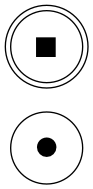

In [57]:
net, im, fm = pm4py.discover_petri_net_alpha(
    df,
    activity_key='event',
    case_id_key='case_id',
    timestamp_key='timestamp')
pm4py.view_petri_net(net, im, fm, format='png')

In [59]:
log_skeleton = pm4py.discover_log_skeleton(
    df,
    noise_threshold=0.1,
    activity_key='event',
    case_id_key='case_id',
    timestamp_key='timestamp')
log_skeleton2 = pm4py.conformance_log_skeleton(
    df,
    log_skeleton,
    activity_key='event',
    case_id_key='case_id',
    timestamp_key='timestamp')

pm4py.write_xes(
    df,
    './final_logs.xes',
    activity_key='event',
    case_id_key='case_id',
    timestamp_key='timestamp')